# REDDIT EMOTION RECOGNITION

# Part 1. Reddit API

-> Using Praw, the Python-Reddit API Wrapper, we connect to the reddit Script Application created with our credentials to retrieve random reddit comments and metadata. We use this data to analyze reddit emotions and correlations.

In [ ]:
!pip install praw

     |████████████████████████████████| 176 kB 5.1 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 


**Input your Client ID and Secret**

In [ ]:
client_id = ""
client_secret = ""
user_agent = "redditdev emotion_analyzer by u/Locke_of_these_days"
import praw

reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent,check_for_async = False
    
)

-> There is no direct way to retrieve random comments on reddit. So, we follow a different approach.

-> Reddit has a nice feature - the r/all "subreddit" - which as far as the API is concerned, works as a subreddit but rather is a place where all the posts of all subreddits reside. We extract random posts from this place, and get the information about the person who posted it. Then, we get the person's comment history, on which we can perform emotion recognition.

In [ ]:
import pandas as pd
import numpy as np

columns = ['id','name','comment_karma','created_utc','has_verified_email','is_employee','is_mod','is_gold']
redditor_info = pd.DataFrame(columns = columns)
redditor_info_index = 0
cols = ['commentid','author','body','created_utc','distinguished','edited','is_submitter','link_id','parent_id','saved','score','stickied','subreddit_id']
comment_info = pd.DataFrame(columns = cols)
comment_index = 0

def add_redditor_info(random_redditor):
    global redditor_info
    global redditor_info_index
    redditor_info.loc[redditor_info_index] = [random_redditor.id,random_redditor.name,random_redditor.comment_karma,random_redditor.created_utc,random_redditor.has_verified_email,random_redditor.is_employee,random_redditor.is_mod, random_redditor.is_gold]
    redditor_info_index += 1
def add_comment_info(comment):
    global comment_info
    global comment_index 
    comment_info.loc[comment_index] = [comment.id,comment.author,comment.body,comment.created_utc,comment.distinguished,comment.edited,comment.is_submitter,comment.link_id,comment.parent_id,comment.saved,comment.score,comment.stickied,comment.subreddit_id]
    comment_index += 1

for i in range(1000):
    
    random_submission = reddit.subreddit('all').random()
    random_redditor = random_submission.author
    if(random_redditor == None):
        continue
    add_redditor_info(random_redditor)
    print(random_redditor,i)
    if(i%100 == 0):
        redditor_info.to_csv('askreddit_redditor_info.csv')
        comment_info.to_csv('askreddit_comment_info.csv')
    for comment in random_redditor.comments.new(limit = None):
        add_comment_info(comment)

In [ ]:
redditor_info.to_csv('redditor_info.csv')
comment_info.to_csv('comment_info.csv')

#Part 2. Reddit Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv('/content/drive/Shared drives/641 project/comment_info_consol.csv')
data

Mounted at /content/drive


,Unnamed: 0,commentid,author,body,created_utc,distinguished,edited,is_submitter,link_id,parent_id,saved,score,stickied,subreddit_id
0,0,i58cw1h,davetowers646,Right? My most favourite looks are this and he...,1.650302e+09,NaN,False,True,t3_u6hgz6,t1_i5876a4,False,32,False,t5_2t3or
1,1,i57oq8n,davetowers646,This is amazing. I love this! This is why I co...,1.650293e+09,NaN,False,False,t3_u6ecpv,t3_u6ecpv,False,13,False,t5_2t3or
2,2,i57mld6,davetowers646,"""I'm back again, back for more, Boston T witho...",1.650292e+09,NaN,False,False,t3_u6d4ux,t3_u6d4ux,False,57,False,t5_2t3or
3,3,i54hb59,davetowers646,Fruit Salad Chews realness,1.650227e+09,NaN,False,False,t3_u5v3h6,t3_u5v3h6,False,16,False,t5_2t3or
4,4,i54dl06,davetowers646,WOW seeing this:\r\n\r\n![gif](giphy|Y077qfBlP...,1.650226e+09,NaN,False,False,t3_u5tgod,t3_u5tgod,False,356,False,t5_2t3or
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327574,327574,hsf8wtc,alice_kitten_,Thank you for this. I actually did wind up spe...,1.642034e+09,NaN,False,False,t3_rzltug,t1_hsbig0q,False,1,False,t5_2qhu4
327575,327575,hsc95cw,alice_kitten_,I appreciate your input. I think this guy is j...,1.641990e+09,NaN,False,False,t3_rzltug,t1_hsbamb3,False,1,False,t5_2qhu4
327576,327576,hsabtb4,alice_kitten_,"Hi all. I got Two of Swords, the Lovers, and A...",1.641949e+09,NaN,1641949965.0,False,t3_rzltug,t3_rzltug,False,1,False,t5_2qhu4
327577,327577,himx9cm,alice_kitten_,Daddies,1.635598e+09,NaN,False,False,t3_qi8hlw,t3_qi8hlw,False,1,False,t5_2qtn5


In [ ]:
!pip install text2emotion

     |████████████████████████████████| 57 kB 2.4 MB/s 
     |████████████████████████████████| 175 kB 8.8 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=46489c3a5aab0001a5f77ab8cba28ea7ae392ba40e28b642d91b68fb35a93799
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
#Packages for Analysis
import numpy as np
import re
import tensorflow as tf
from tensorflow import keras
import pickle
import text2emotion as te
import nltk
nltk.download('punkt')
from nltk import tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


-> A model trained on the gold labelled Twitter data helps us soft label our reddit comments with a little bit of pre-processing.

In [ ]:
#Load Gold Label Model for emotions

model = keras.models.load_model("emotion_model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    model_tokenizer = pickle.load(handle)
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def process_text(comment):
  if("![gif]" in comment):
      comment = re.sub('!\[gif\]\(.*\)', '', comment )
  comment = re.sub(r'http\S+', '', comment)
  comment = comment.lower()
  comment  = re.sub('[^a-zA-Z0-9]',' ',comment)
  comment = comment.replace("\t"," ")
  comment = comment.replace("\n"," ")
  comment = re.sub(r"\s\s*", " ", comment)
  return comment

def emotoindex(s):
  if(s=='Happy'):
    return 0
  if(s=='Angry'):
    return 1
  if(s=='Surprise'):
    return 2
  if(s=='Sad'):
    return 3
  if(s=='Fear'):
    return 4

def create_emotion_history_df(df_new,person_emo_dict):
  people = df_new.iloc[:,0]
  unique_people = set(people)
  emotion_history_df = pd.DataFrame(columns = ['person','anger','surprise','joy','sadness','love','fear'])
  index = 0
  for person in person_emo_dict.keys():
    emotion_history_df.loc[index] = [person] + person_emo_dict[person]
    index += 1
  return emotion_history_df

Define Dictionaries that store the counts of each emotion as we loop through the comments.

In [ ]:
#Variables
total_emo_dict = {'anger':0,'joy':0,'surprise':0,'love':0,'sadness':0,'fear':0}
person_emo_dict = {}
index_to_emotion = {0: 'anger', 1: 'surprise', 2: 'joy', 3: 'sadness', 4: 'love', 5: 'fear'}
emotion_to_index = {'anger':0,'surprise':1,'joy':2,'sadness':3,'love':4,'fear':5}
emotion_to_index_te = {'Happy': 0, 'Angry': 1, 'Surprise': 2, 'Sad': 3, 'Fear': 4}

soft_labelled_data = []
cols =  ['Unnamed','commentid','author','soft_comment_emotion','te_dict','te_comment_emotion','body','created_utc','distinguished','edited','is_submitter','link_id','parent_id','saved','score','stickied','subreddit_id']
df_new  = pd.DataFrame(columns = cols)


Note: Better run this in system, Colab take too much time to execute it, as there are ~ 300k comments

In [ ]:
index = 0
for i in range(0,len(data.index)) :
    print(i,end=' ')
    
    '''
    Uncomment for Debugging
    if(i>10):
      break
    '''
    row = data.iloc[i]

    

    comment = row[3]
    person = row[2]
    new_row = row.copy().tolist()
  
    if(person not in person_emo_dict):
      person_emo_dict[person] = [0,0,0,0,0,0]
    sub_emo_dict = {'anger':0,'joy':0,'surprise':0,'love':0,'sadness':0,'fear':0}
    comment_copy = process_text(str(comment)[:])
    
    comment_sequence = get_sequences(model_tokenizer,[comment_copy])
    label = model.predict(comment_sequence)
    emotion_index=np.argmax(label,axis=1)[0]
    t = te.get_emotion(comment_copy)

    max_key = max(t, key=t.get)
    index1 = emotoindex(max_key)
    person_emotion_list = person_emo_dict[person]
    person_emotion_list[index1] +=1
    person_emo_dict[person] = person_emotion_list

    
    #soft_labelled_data.append([comment,max_key])
    new_row = new_row[:3]+[index_to_emotion[emotion_index],t,max_key,comment_copy] + new_row[4:]
    df_new.loc[index] = new_row
    index +=1
    if(i%1000 == 0):
      emotion_history_df = create_emotion_history_df(df_new,person_emo_dict)
      df_new.to_csv('df_new.csv')
      emotion_history_df.to_csv('emotion_history.csv')
       
      


emotion_history_df = create_emotion_history_df(df_new,person_emo_dict)




0 1 2 3 4 5 6 7 8 9 10 11 

In [ ]:
#Run Entire code for full output!
emotion_history_df


,person,anger,surprise,joy,sadness,love,fear
0,davetowers646,12,4,6,0,0,0


In [ ]:
df_new.to_csv('df_new.csv')
emotion_history_df.to_csv('emotion_history.csv')

#Part 3. Visualizations


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/Shared drives/641 project/consol_reddit_emotion.csv')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,person,anger sl,surprise sl,joy sl,sadness sl,love sl,fear sl,Angry te,Fear te,Happy te,Sad te,Surprise te,Angry temax,Fear temax,Happy temax,Sad temax,Surprise temax
0,0,spoopydoopyjoopy,11,168,52,129,174,243,30.28,163.68,82.90,124.17,142.65,37,117,346,114,163
1,1,BadKarma-18,15,96,24,36,82,105,7.21,94.24,39.02,57.18,63.24,8,90,141,51,68
2,2,Peoerson,8,106,35,39,115,88,17.56,115.34,37.28,55.06,74.54,15,119,135,47,75
3,3,Doomed,18,279,103,110,272,217,37.23,362.97,93.87,190.08,175.23,32,404,247,154,162
4,4,lobester250,1,3,1,8,2,823,1.00,1.00,0.00,3.00,1.00,1,1,832,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,506,ReporterIndependent,0,12,4,4,3,14,0.25,3.50,7.25,4.50,2.50,0,4,27,4,2
507,507,AvatarMCThrowaway,0,19,5,20,18,35,1.62,15.27,7.14,11.17,21.77,1,12,51,8,25
508,508,anuther_human,1,4,0,2,2,1,0.70,3.53,0.78,0.84,3.15,1,6,2,0,1
509,509,Planet0259-S,74,370,142,272,306,762,53.96,373.12,194.60,274.36,271.48,50,344,1004,248,280


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Emotion counts for every user

In [ ]:
data = data.loc[:,['person','Angry temax','Fear temax','Happy temax','Sad temax','Surprise temax']]
data

,person,Angry temax,Fear temax,Happy temax,Sad temax,Surprise temax
0,spoopydoopyjoopy,37,117,346,114,163
1,BadKarma-18,8,90,141,51,68
2,Peoerson,15,119,135,47,75
3,Doomed,32,404,247,154,162
4,lobester250,1,1,832,3,1
...,...,...,...,...,...,...
506,ReporterIndependent,0,4,27,4,2
507,AvatarMCThrowaway,1,12,51,8,25
508,anuther_human,1,6,2,0,1
509,Planet0259-S,50,344,1004,248,280


**FUNCTIONS FOR STATS**


In [ ]:
def print_column_graph(colname):
  col = data[colname].tolist()
  plt.plot(col)
  plt.title(colname+' Distribution in data')
  plt.show()

def print_row_graph(rownum):
  sns.set_style('darkgrid')
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  row  = data.loc[rownum].tolist()[1:]
  x = ['anger','fear','happy','sadness','surprise']
  ax.bar(x,row,color=['red','magenta','green','blue','cyan'])
  plt.title('1 person\'s emotional print on reddit')
  plt.show()

def prioritize_emotions(data):
  sample = data.loc[0]
  columns = data.columns.tolist()[1:] #Subtract 1 because the first column is UserID
  greatest_emotions = data.iloc[:,1:].idxmax(axis=1)
  greatest_emotion_dict = pd.Series([0]*len(columns),index=columns).to_dict()
  greatest_emotion_dict2 = greatest_emotion_dict.copy()
  for val in greatest_emotions:
    greatest_emotion_dict[val] +=1
  for row in data.iterrows():  #For each row of the dataframe
    for val in columns:  #Returns the relavent columns of our dataframe
      greatest_emotion_dict2[val] += row[1][val]
  return greatest_emotion_dict , greatest_emotion_dict2


def plot_dict(data):    
  names = list(data.keys())
  values = list(data.values()) 
  plt.bar(range(len(data)), values, tick_label=names)
  plt.title('Emotion of the entire data')
  plt.show()  


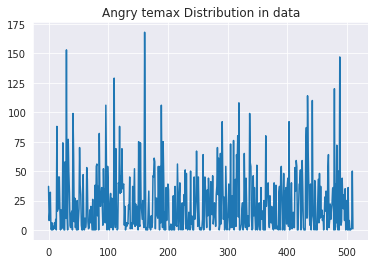

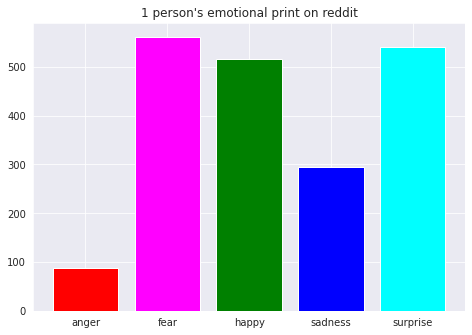

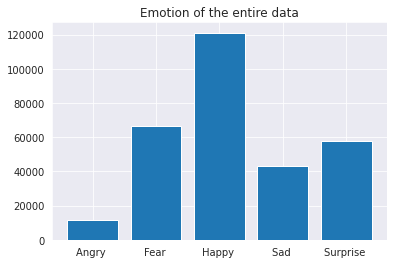

In [ ]:
print_column_graph('Angry temax')

print_row_graph(14)
dict1,dict2 = prioritize_emotions(data)
dict3 = {}
for key in dict2:
  dict3[key.replace('temax','')] = dict2[key]

plot_dict(dict3)

In [ ]:
from datetime import datetime

In [ ]:
def get_emotion_history(persondata):
  personemotion = persondata.loc[:,['te_comment_emotion','created_utc']]
  emotion_history = {}
  for row in personemotion.iterrows():
    
    row = row[1]
    emo = row[0]
    ts = float(row[1])
    dt = datetime.utcfromtimestamp(ts)
    if(dt.year <2020):
        continue
    stamp = str(dt.year)+'_'+str(dt.month)
    
    if(stamp not in emotion_history):
        emotion_history[stamp] = {'Surprise':0,'Happy':0,'Sad':0,'Fear':0,'Angry':0}
    emotion_history[stamp][emo] += 1
  return emotion_history
  
def plot_emotion_history(emotion_history,title):
  index = 0
  x = []
  surprise = []
  happy = []
  sad = []
  fear = []
  anger = []

  for key in emotion_history:
    index +=1
    x.append(key)
    ed = emotion_history[key]
    surprise.append(ed['Surprise'])
    happy.append(ed['Happy'])
    sad.append(ed['Sad'])
    fear.append(ed['Fear'])
    anger.append(ed['Angry'])

  plt.plot(x[-1:0:-1],surprise[-1:0:-1],'cyan',label = 'Surprise')
  plt.plot(x[-1:0:-1],happy[-1:0:-1],'green',label = 'Joy')
  plt.plot(x[-1:0:-1],sad[-1:0:-1],'blue',label = 'Sadness')
  plt.plot(x[-1:0:-1],fear[-1:0:-1],'magenta',label = 'fear')
  plt.plot(x[-1:0:-1],anger[-1:0:-1],'red',label = 'Anger')
  plt.legend()
  plt.title(title)
  plt.show()


In [ ]:
data = pd.read_csv('consol_reddit_comments.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,commentid,author,soft_comment_emotion,te_dict,te_comment_emotion,body,created_utc,distinguished,edited,is_submitter,link_id,parent_id,saved,score,stickied,subreddit_id
0,i58cw1h,davetowers646,joy,"{'Happy': 0.4, 'Angry': 0.0, 'Surprise': 0.4, ...",Happy,right my most favourite looks are this and her...,1.650302e+09,NaN,False,True,t3_u6hgz6,t1_i5876a4,False,32,False,t5_2t3or
1,i57oq8n,davetowers646,joy,"{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.33...",Happy,this is amazing i love this this is why i come...,1.650293e+09,NaN,False,False,t3_u6ecpv,t3_u6ecpv,False,13,False,t5_2t3or
2,i57mld6,davetowers646,surprise,"{'Happy': 0.0, 'Angry': 0.5, 'Surprise': 0.0, ...",Angry,i m back again back for more boston t without...,1.650292e+09,NaN,False,False,t3_u6d4ux,t3_u6d4ux,False,57,False,t5_2t3or
3,i54hb59,davetowers646,sadness,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",Happy,fruit salad chews realness,1.650227e+09,NaN,False,False,t3_u5v3h6,t3_u5v3h6,False,16,False,t5_2t3or
4,i54dl06,davetowers646,fear,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, ...",Surprise,wow seeing this,1.650226e+09,NaN,False,False,t3_u5tgod,t3_u5tgod,False,356,False,t5_2t3or


In [ ]:
people = set(data.loc[:,'author'])
people

In [ ]:
persondata = data[data['author']=='HowerTwo']
persondata.head()

,commentid,author,soft_comment_emotion,te_dict,te_comment_emotion,body,created_utc,distinguished,edited,is_submitter,link_id,parent_id,saved,score,stickied,subreddit_id
251328,i5d162l,HowerTwo,love,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, ...",Surprise,beat me to it,1.650386e+09,NaN,False,False,t3_u77ng1,t1_i5cykfa,False,3,False,t5_qir9n
251329,i5d148w,HowerTwo,fear,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",Sad,that makes the cops racist though,1.650386e+09,NaN,False,False,t3_u77ng1,t3_u77ng1,False,9,False,t5_qir9n
251330,i5cs398,HowerTwo,sadness,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",Happy,should ve nudged him,1.650383e+09,NaN,False,False,t3_u712zk,t3_u712zk,False,1,False,t5_3aimx
251331,i5cmlgy,HowerTwo,joy,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",Happy,umm what s your most upvoted meme okay,1.650380e+09,NaN,False,True,t3_u70bsd,t1_i5cltwo,False,1,False,t5_3i60n
251332,i5cmdxq,HowerTwo,sadness,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",Fear,your mom was busy so had to make a meme instead,1.650380e+09,NaN,False,True,t3_u70bsd,t1_i5c6syw,False,3,False,t5_3i60n


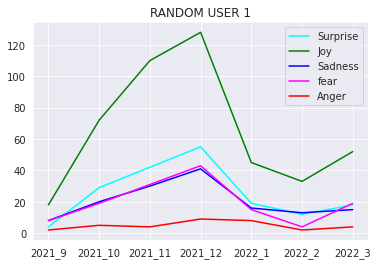

In [ ]:
emotion_history = get_emotion_history(persondata)
plot_emotion_history(emotion_history,'RANDOM USER 1')
    
    
    

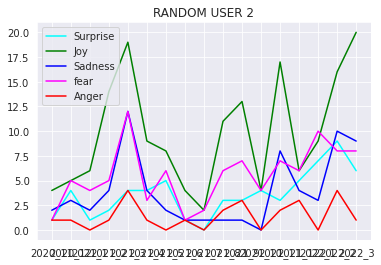

In [ ]:
persondata = data[data['author']=='weliveinthepast']
emotion_history = get_emotion_history(persondata)
plot_emotion_history(emotion_history,'RANDOM USER 2')
    

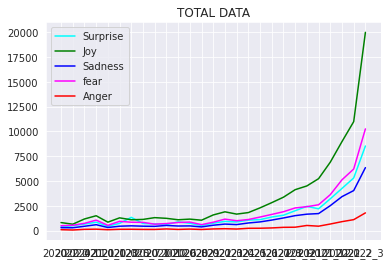

In [ ]:
emotion_history = get_emotion_history(data)
plot_emotion_history(emotion_history,'TOTAL DATA')
    

The data is heavily influenced by the bias of the Social Media platform and the algorithms used. We can assuage the situation by changing the probabilities of emotion of each person (which we assume are likelihoods) to posterior probabilities. 
This tells us how much one person is displaying enotions **compared to the data average.**


In [ ]:
#Update data with Posteriori instead of likelihood
def posteriori_data(data,divide_by_evidence = True):
  dict1,dict2 = prioritize_emotions(data)
  columns = data.columns.tolist()[1:] #Subtract 1 because the first column is UserID
  ld = len(data)
  for key in dict2:
    dict2[key] /= ld
  priors = dict2.copy()
  for row in data.iterrows():  #For each row of the dataframe
    evidence = 0
    for val in columns:  #Returns the relavent columns of our dataframe
      p_and_e = priors[val]
      row[1][val] *= p_and_e
      evidence+= p_and_e
    if(divide_by_evidence):
      for val in columns:
        row[1][val] /= evidence
  return data
    
posterior_data = posteriori_data(data.copy(),True)     

posterior_data.to_csv('reddit_emotion_posterior.csv')  
